In [24]:
import os

In [2]:
parasite = os.listdir('cell_images/Parasitized/')


In [25]:
non_parasite = os.listdir('cell_images/Uninfected/')

In [26]:
non_parasite[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [4]:
len(parasite)

13780

In [5]:
len(non_parasite)

13780

In [6]:
import cv2 as cv

In [17]:
sdata = {}
sdata['data'] = []
sdata['status'] = []

In [18]:
data = []
status = []

In [8]:
parasite[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [19]:
for i in range(0, len(parasite)):
    img = cv.imread("cell_images/Parasitized/"+parasite[i])
    data.append(img)
    status.append('1')

In [20]:
for i in range(0, len(non_parasite)):
    img = cv.imread("cell_images/Uninfected/"+non_parasite[i])
    data.append(img)
    status.append('0')

In [22]:
for i in range(len(data)):
        sdata['status'].append(status[i])
        sdata['data'].append(data[i]) 

In [1]:
from joblib import dump, load

In [24]:
dump(sdata, 'malaria_13.joblib')

['malaria_13.joblib']

In [2]:
df = load('malaria_13.joblib')

In [16]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

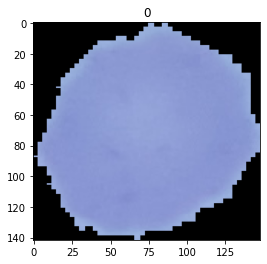

In [4]:
# iimg = cv.imread(df['data'][0])
plt.title(df['status'][16000])
plt.imshow(df['data'][16000])
plt.show

In [18]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
img_data = []
for i in df['data']:
    img = np.array(i).flatten()
    img_data.append(img)

In [8]:
len(img_data)

27560

In [36]:
len(df['data'])

27560

In [10]:
len(df['status'])

27560

In [22]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['data']), np.array(df['status']), test_size=0.2 )

<ipython-input-22-077795ed855d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, x_test, y_train, y_test = train_test_split(np.array(df['data']), np.array(df['status']), test_size=0.2 )


<function matplotlib.pyplot.show(close=None, block=None)>

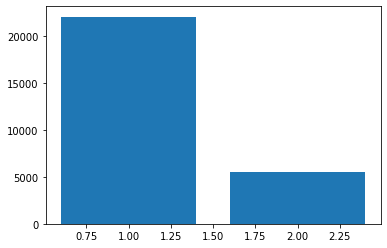

In [13]:
plt.bar([1,2], [len(x_train), len(x_test)])
plt.show

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [3]:
width = 128
height = 128

In [4]:
trainDatagen = datagen.flow_from_directory(directory='cell_images/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [5]:
valDatagen = datagen.flow_from_directory(directory='cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [10]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =1,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

<ipython-input-10-4498a1cdf635>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


1378/1378 [==============================] - 925s 670ms/step - loss: 0.4310 - accuracy: 0.8035 - val_loss: 0.2385 - val_accuracy: 0.9243


In [11]:
model.save('malaria_model1.h5')

In [12]:
from keras.preprocessing import image

In [13]:
from keras.applications.mobilenet import preprocess_input

In [14]:
def pretrained_path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(128, 128))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    plt.imshow(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    x = np.expand_dims(x, axis=0)
    # convert RGB -> BGR, subtract mean ImageNet pixel, and return 4D tensor
    return preprocess_input(x)

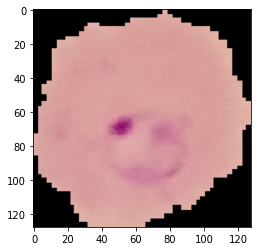

In [19]:
img_path = "cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
tensor = pretrained_path_to_tensor(img_path)

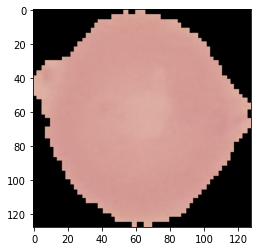

In [27]:
img_path = "cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png"
tensor = pretrained_path_to_tensor(img_path)

In [21]:
from keras.models import load_model
model = load_model("malaria_model1.h5")

In [30]:
output = model(tensor)
print(output)
output = np.array(output)
print(output)
print(np.argmax(output))
# print('NORMAL Prob:' ,float(output[0][0])*100,' Malaria Prob:',float(output[0][1])*100)
if np.argmax(output) == 1:
  print('The sample is positive')
else:
  print('The sample is negative')

tf.Tensor([[0.6921741]], shape=(1, 1), dtype=float32)
[[0.6921741]]
0
The sample is negative
